In [1]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random, pickle
from tqdm import tqdm
from matplotlib import pyplot as plt
import cv2, time

In [2]:
def save_pickle(data, filename):
    with open("{}.pickle".format(filename), 'wb') as t:
        pickle.dump(data, t)
    print("PICKLE SAVE DONE")

def show_img(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

## Configs

In [3]:
# chormosome의 개수
POPULATION = 100

# 좋은 chormosome의 개수
GOOD_PARENTS_CNT = 30

# 운좋은 chormosome의 개수
LUCKY_PARENTS_CNT = 10

# 각 parent가 만드는 chromosome 개수
CHILDREN_CNT = 5

# 돌연변이 생성 비율
MUTATION_PROB = 0.1

# 최대 세대 수 
MAX_GENERATIONS = 50

## Load the image

In [4]:
# Load Image

IMA_ARR = cv2.imread('Bigger-Splash-1967.jpg')

# jpg_img_arr = mpimg.imread('Bigger-Splash-1967.jpg')
# jpg_IMG = Image.open('Bigger-Splash-1967.jpg')
# FLATTENED = jpg_img_arr.flatten()
# LEN_FLATTENED = len(FLATTENED)
# print("flattend size :", FLATTENED.shape)

## Initial Population

In [5]:
sorted([1,2], reverse=False)

[1, 2]

In [6]:
class chromoSome:
    def __init__(self, real_img, res=10, chromo_data=None):
        self.real_img = real_img
        self.img_size = real_img.shape
        self.res = res
        
        if chromo_data is None:
            self.create_random_img()
        else:
            self.img = chromo_data
    
    def __repr__(self):
        return "chromosome fitenss : {}".format(self.fitness)
    
    @property
    def fitness(self):
        # score가 0에 가까우면 좋은 것
        
        score = 0
        
        dist = abs(self.real_img-self.img).sum()
        #dist = np.linalg.norm(self.real_img - self.img) / (self.img_size[0] * self.img_size[1])
        score = 1. / dist
        

        return score
    
    def create_random_img(self):
        self.img = np.zeros(self.img_size, np.uint8)
        self.assign_circle()
        
        
    def assign_circle(self):
        center_x = np.random.randint(0, self.img_size[1])
        center_y = np.random.randint(0, self.img_size[0])
        radius = np.random.randint(0, self.img_size[0]/4)
        #radius   = np.random.randint(0, int(self.img_size[0] / (1.1*self.res)))
        opacity  = np.random.rand(1)[0]
        color    = chromoSome.get_bgr_color()
        
        overlay  = self.img.copy()
        cv2.circle(overlay, (center_x, center_y), radius, color, -1)
        cv2.addWeighted(overlay, opacity, self.img, 1 - opacity, 0, self.img)
        
        
    def get_bgr_color():
        blue  = np.random.randint(0, 255)
        green = np.random.randint(0, 255)
        red   = np.random.randint(0, 255)
        return (blue, green, red)
        

class Generation:
    cnt = 0
    def __init__(self, population):
        Generation.cnt += 1
        self.generation_lv = Generation.cnt
        self.population = population
        self.sorted_pop = self.sort_pop()

    
    def __repr__(self):
        return "Generation Level : {}".format(self.generation_lv)
    
 
    def assign_fitness(self):
        self.best_chromo = self.sorted_pop[0]
        self.second_chromo = self.sorted_pop[1]
           
    def evolution(self):
        
        #print("Start Evolution Generation level %d" % Generation.cnt)
        self.assign_fitness()
        
        children = list()
        for _ in range(POPULATION):
            child = self.make_child()
            children.append(child)
        

#         good_parents = self.sorted_pop[:GOOD_PARENTS_CNT]
        
        
        # select Lucky_parents
#        lucky_parents = random.sample(self.sorted_pop[GOOD_PARENTS_CNT:], LUCKY_PARENTS_CNT)
        
#         # make Childeren
#         good_child = self.make_children(good_parents)
#         lucky_child = self.make_children(lucky_parents)
        
#         # merge Childeren
#         children = good_child + lucky_child
#         random.shuffle(children)
        
#         # make mutations
#         children = self.make_mutation(children)
                
        return Generation(children)
    
    def sort_pop(self):
        sorted_pop = sorted(self.population, key=lambda x: x.fitness, reverse=False)
        #self.best = sorted_pop[0]
        
        return sorted_pop
    
    def make_child(self):

        ind1_weight = np.random.rand(1)[0]
        new_image = np.zeros((self.population[0].img_size), dtype=np.uint8)
        
        cv2.addWeighted(self.best_chromo.img, ind1_weight, self.second_chromo.img, 1 - ind1_weight, 0, new_image)
        child = chromoSome(real_img=self.best_chromo.real_img, chromo_data=new_image)
        
        
        # crossover
#         for i in range(int(len(parents) / 2)):
            
            
            # 한개는 중간에서 반반 섞기
#             split_child = chromoSome(parents[i].chromo[:int(LEN_FLATTENED/2)] + parents[len(parents)-1-i].chromo[:int(LEN_FLATTENED/2)])
#             children.append(split_child)
            
#             # 나머지는 랜덤으로 가져오기
#             for _ in range(CHILDREN_CNT - 1):
#                 random_child = chromoSome(random.sample(parents[i].chromo + parents[len(parents)-1-i].chromo, LEN_FLATTENED))
#                 children.append(random_child)
        
        return child
    
    @property
    def mean_fitness(self):
        return np.mean([chromosome.fitness for chromosome in self.population])
    
    @property
    def get_best(self):
        return sorted(self.population, key=lambda x: x.fitness, reverse=False)[0]
    
    
    def make_mutation(self, children):
        # mutated = list()
        mutation_cnt = int(len(children) * MUTATION_PROB)
        for i in range(mutation_cnt):
            children[i] = chromoSome(np.random.randint(0,255,size=IMA_ARR.shape))
            #children[i] = chromoSome([np.random.randint(255) for _ in range(LEN_FLATTENED)])
        
        return children
    
    def fitness(self):
        return np.mean([chromo.fitness for chromo in self.population])

In [7]:
IMA_ARR = cv2.imread('Bigger-Splash-1967.jpg')
fitness_list = list()

initial_pop = [chromoSome(real_img=IMA_ARR) for _ in range(POPULATION)]
gen = Generation(initial_pop)
g = gen.evolution()

for i in tqdm(range(10000)):
    gen = gen.evolution()
    
    if i % 100 == 0:
        best = gen.get_best
        fitness_list.append(best.fitness)
        cv2.imwrite("./img/{}_img.jpg".format(i), best.img)
        

# best = gen.get_best

  3%|▎         | 293/10000 [01:34<52:39,  3.07it/s]

KeyboardInterrupt: 

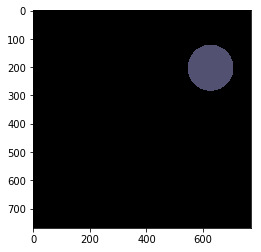

In [16]:
#show_img(gen.sorted_pop[32].img)
show_img(initial_pop[10].img)

In [7]:
initial_pop = [chromoSome(real_img=IMA_ARR) for _ in range(POPULATION)]

KeyboardInterrupt: 

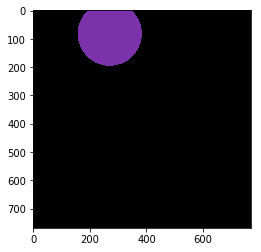

In [10]:
for i in initial_pop:
    show_img(i.img)
    time.sleep(0.3)
    

In [ ]:
# first generation

i = 0
initial_population = [chromoSome() for _ in range(POPULATION)]
gen = Generation(initial_population)
print(gen)


mean_fitness_list = list()
for num in tqdm(range(MAX_GENERATIONS)):
    gen = gen.evolution()
    mean_fitness = gen.mean_fitness
    print("mean fitness : {}".format(mean_fitness))
    mean_fitness_list.append(mean_fitness)

best_chromosome = gen.get_best

save_pickle(mean_fitness_list, "mean_fitness_list")
save_pickle(best_chromosome, "best_chromosome")

Generation Level : 1


  0%|          | 0/50 [00:00<?, ?it/s]

Start Evolution Generation level 1


  2%|▏         | 1/50 [11:57<9:45:58, 717.52s/it]

mean fitness : 154164577.91
Start Evolution Generation level 2


  4%|▍         | 2/50 [24:00<9:35:13, 719.03s/it]

mean fitness : 154159844.95
Start Evolution Generation level 3


  6%|▌         | 3/50 [36:00<9:23:35, 719.47s/it]

mean fitness : 154144637.81
Start Evolution Generation level 4


In [2]:
def load_pickle(filepath):
    with open("{}.pickle".format(filepath), 'rb') as t:
        data = pickle.load(t)
    print("PICKLE LOAD DONE")
    return data


In [24]:
best_chromosome = load_pickle("best_chromosome")
mean_fit = load_pickle("mean_fitness_list")

PICKLE LOAD DONE
PICKLE LOAD DONE


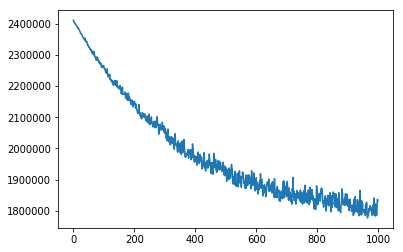

In [25]:
plt.plot(mean_fit)
plt.show()

In [14]:
jpg_img_arr.shape

(768, 768, 3)

In [15]:
resized = jpg_IMG.resize((96,96))

In [17]:
resized.save('resized.jpg')

### 중간확인

PICKLE LOAD DONE


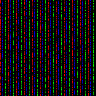

In [42]:
test_arr = mpimg.imread('resized.jpg')
test_img = Image.open('resized.jpg')
n_best = load_pickle("17400_best")
#best_chromosome
reshapen = np.reshape(n_best.chromo, test_arr.shape)
reshapen_img = Image.fromarray(reshapen, 'RGB')
reshapen_img

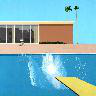

In [37]:
flatten = test_arr.flatten()
re = np.reshape(flatten, test_arr.shape)
re_img = Image.fromarray(re, 'RGB')
re_img

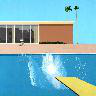

In [38]:
test_img

In [ ]:
    import numpy as np
    import cv2
    import argparse
    from random import shuffle
    import matplotlib.pyplot as plt


    class Individual:

        # shape = rectangular, circle, polygon, mixed.
        # img_size = 2-dimensional (height, width)
        def __init__(self, img_size, nbr_of_shapes, shape='circle', _res=10):
            self.shape_ 		   = shape
            self.img_size_ 		   = img_size
            self.nbr_of_shapes_    = nbr_of_shapes
            self.shape_func_dict_  = {'line' : self.assign_line, 'circle' : self.assign_circle, 'rectangular' : self.assign_rect, 
                                    'polygon' : self.assign_poly, 'dot' : self.assign_dot, 'mixed' : self.assign_mixed}
            self.nbr_of_vertices_  = 8
            self.shape_funct_list_ = ['dot', 'line', 'circle', 'rectangular', 'polygon']
            self.fitness_ 		   = 0
            self.percent_		   = 0
            self.image_            = None
            self.shape_list_       = []
            self.res_			   = _res

        def create_random_image(self):
            self.image_ = np.zeros((self.img_size_[0], self.img_size_[1], 3), np.uint8)

            for i in range(self.nbr_of_shapes_):
                self.shape_func_dict_[self.shape_]()

        def assign_mixed(self):
            i = np.random.randint(0, 5)
            self.shape_func_dict_[self.shape_funct_list_[i]]()

        def assign_dot(self):
            for i in range(5):
                center_x = np.random.randint(0, self.img_size_[1])
                center_y = np.random.randint(0, self.img_size_[0])
                radius   = np.random.randint(0, int(self.img_size_[0] / 100.))
                opacity  = np.random.rand(1)[0]
                color    = Individual.get_bgr_color()

                overlay  = self.image_.copy()
                cv2.circle(overlay, (center_x, center_y), radius, color, -1)

                cv2.addWeighted(overlay, opacity, self.image_, 1 - opacity, 0, self.image_)

        def assign_line(self):
            min_x     = np.random.randint(0, self.img_size_[1])
            max_x     = min_x + np.random.randint(-1, 2) * np.random.randint(5, int(self.img_size_[1] / 5.))
            min_y     = np.random.randint(0, self.img_size_[0])
            max_y     = min_y + np.random.randint(-1, 2) * np.random.randint(5, int(self.img_size_[0] / 5.))
            opacity   = np.random.rand(1)[0]
            thickness = np.random.randint(1, 5)
            color     = Individual.get_bgr_color()

            overlay  = self.image_.copy()
            cv2.line(overlay, (min_x, min_y), (max_x, max_y), color, thickness)

            cv2.addWeighted(overlay, opacity, self.image_, 1 - opacity, 0, self.image_)

        def assign_circle(self):
            center_x = np.random.randint(0, self.img_size_[1])
            center_y = np.random.randint(0, self.img_size_[0])
            radius   = np.random.randint(0, int(self.img_size_[0] / (1.1*self.res_)))
            opacity  = np.random.rand(1)[0]
            color    = Individual.get_bgr_color()

            overlay  = self.image_.copy()
            cv2.circle(overlay, (center_x, center_y), radius, color, -1)

            cv2.addWeighted(overlay, opacity, self.image_, 1 - opacity, 0, self.image_)

        def assign_rect(self):
            min_x = np.random.randint(0, self.img_size_[1])
            max_x = min_x + np.random.randint(5, int(self.img_size_[1] / self.res_))
            min_y = np.random.randint(0, self.img_size_[0])
            max_y = min_y + np.random.randint(5, int(self.img_size_[0] / self.res_))
            opacity  = np.random.rand(1)[0]
            color    = Individual.get_bgr_color()



            overlay  = self.image_.copy()
            cv2.rectangle(overlay, (min_x, min_y), (max_x, max_y), color, -1)

            cv2.addWeighted(overlay, opacity, self.image_, 1 - opacity, 0, self.image_)

        def assign_poly(self):
            pts = []
            point = [np.random.randint(0, self.img_size_[1]), 
                        np.random.randint(0, self.img_size_[0])]
            pts.append(point)

            for i in range(self.nbr_of_vertices_-1):
                new_point = [point[0] + np.random.randint(-1, 2) * np.random.randint(0, int(self.img_size_[1] / self.res_)), 
                             point[1] + np.random.randint(-1, 2) * np.random.randint(0, int(self.img_size_[0] / self.res_))]
                pts.append(new_point)


            pts 	 = np.array(pts)
            pts 	 = pts.reshape((-1, 1, 2))
            opacity  = np.random.rand(1)[0]
            color    = Individual.get_bgr_color()


            overlay  = self.image_.copy()

            cv2.fillPoly(overlay, [pts], color, 8)
            cv2.addWeighted(overlay, opacity, self.image_, 1 - opacity, 0 ,self.image_)

        def show_image(self):
            cv2.imshow('image', self.image_)
            cv2.waitKey(0)
            cv2.destroyAllWindows()


        def draw_circle(self, circle):
            overlay  = self.image_.copy()
            cv2.circle(overlay, (circle.center_x_, circle.center_y_), circle.radius_, circle.color_, -1)

            cv2.addWeighted(overlay, circle.opacity_, self.image_, 1 - circle.opacity_, 0, self.image_)

        def draw_rect(self, rect):
            overlay  = self.image_.copy()
            cv2.rectangle(overlay, (rect.min_x_, rect.min_y_), (rect.max_x_, rect.max_y_), rect.color_, -1)

            cv2.addWeighted(overlay, rect.opacity_, self.image_, 1 - rect.opacity_, 0, self.image_)

        def draw_poly(self, poly):
            overlay  = self.image_.copy()

            cv2.fillPoly(overlay, [poly.pts_], poly.color_, 8)
            cv2.addWeighted(overlay, poly.opacity_, self.image_, 1 - poly.opacity_, 0 ,self.image_)

        def get_bgr_color():
            blue  = np.random.randint(0, 255)
            green = np.random.randint(0, 255)
            red   = np.random.randint(0, 255)
            return (blue, green, red)

    class Genetic:

        '''
        pop_size: # of individuals in the population
        ind_config: individual configuration. 'shape', 'nbr_of_shapes'
        '''
        def __init__(self, _pop_size, _image, _ind_config, _mut_rate=3 ):
            self.pop_size_   = _pop_size
            self.image_	     = _image
            self.ind_config_ = _ind_config
            self.population_ = []
            self.mut_rate_	 = _mut_rate
            self.create_population()


        def create_population(self):
            for i in range(self.pop_size_):
                ind = Individual(self.image_.shape[:-1], self.ind_config_['nbr_of_shapes'],
                                    shape=self.ind_config_['shape'], _res=self.ind_config_['resolution'])
                ind.create_random_image()
                self.population_.append(ind)


        def genetic(self):
            for i in range(250000):
                self.assign_fitnesses()
                self.assign_percentages()
                print("Step #%d, Best Fitness: %.4f" % (i+1, self.best_ind_.fitness_), end="\r")
                if i % 50 == 0:
                    self.visualize_best_ind(i)
                new_pop = []
                new_pop.append(self.best_ind_)
                new_pop.append(self.second_ind_)
                for j in range(self.pop_size_ - 2):
                    x 	  = self.random_selection()
                    y     = self.random_selection()
                    child = self.reproduce(x, y)
                    if (np.random.randint(10) < self.mut_rate_):
                        self.mutate(child, i)
                    new_pop.append(child)
                self.population_ = None
                self.population_ = new_pop
                if i % 1000 == 0:
                    cv2.imwrite('output/Aoutput_final_result.jpg' , self.best_ind_.image_)


        def random_selection(self):
            if len(self.pop_percentage_pool_) == 0:
                print("Pop percentage pool size is 0")
                return self.population_[np.random.randint(0, self.pop_size_ - 1)]
            return self.pop_percentage_pool_[np.random.randint(0, len(self.pop_percentage_pool_) - 1)]


        def reproduce(self, ind1, ind2):
            new_child = Individual(self.image_.shape[:-1], self.ind_config_['nbr_of_shapes'],
                                      shape=self.ind_config_['shape'], _res=self.ind_config_['resolution'])

            # loc = np.random.randint(0, len(ind1.shape_list_) - 1)
            # shape_list = []
            # for i in range(loc):
            # 	shape_list.append(ind1.shape_list_[i])

            # for i in range(loc, len(ind2.shape_list_) - 1):
            # 	shape_list.append(ind2.shape_list_[i])


            # new_child.shape_list_ = shape_list

            # new_child.draw_from_shape_list()

            ind1_weight = np.random.rand(1)[0]
            new_image = np.zeros((self.image_.shape), dtype=np.uint8)
            cv2.addWeighted(ind1.image_, ind1_weight, ind2.image_, 1 - ind1_weight, 0, new_image)
            new_child.image_ = new_image
            return new_child

        def mutate(self, ind, step):
            # ind.assign_poly()
            for i in range(np.random.randint(1, 3)):
                ind.shape_func_dict_[self.ind_config_['shape']]()
            # for i in range(5):
            # 	loc = np.random.randint(0, len(ind.shape_list_) - 1)
            # 	ind.shape_list_[loc].opacity_ = np.random.randn(1)[0]
            # 	ind.shape_list_[loc].color    = Individual.get_bgr_color()
            # 	ind.draw_from_shape_list()

        # Whilst finding fitnesses, the individual that has the best fitness is also being searched
        # for visualization purposes
        def assign_fitnesses(self):
            self.best_ind_   = self.population_[0]
            self.second_ind_ = self.population_[1]
            for index, individual in enumerate(self.population_):
                distance = self.get_distance(index);
                individual.fitness_ = ( 1. / distance) 
                # print("Distance: {0:4f}, Fitnes:: {1:5f}".format(distance, individual.fitness_))
                if individual.fitness_ > self.best_ind_.fitness_:
                    self.best_ind_ = individual
                elif individual.fitness_ > self.second_ind_.fitness_:
                    self.second_ind_ = individual

        def get_distance(self, index, error='mse'):
            return (np.linalg.norm(self.image_.astype('float') - self.population_[index].image_.astype('float'))) / (self.image_.shape[0] * self.image_.shape[1])
            # if error is 'mae':
            # 	error = np.sum(np.abs(self.image_.astype('float') 
            # 					- self.population_[index].image_.astype('float')))
            # 	error /= float(self.image_.shape[0] * self.image_.shape[1])
            # elif error is 'mse':
            # 	error = np.sum( (self.image_.astype('float')
            # 					 - self.population_[index].image_.astype('float')) ** 2)
            # 	error /= float(self.image_.shape[0] * self.image_.shape[1])

            # return error

        def assign_percentages(self):
            total = 0
            for individual in self.population_:
                total += individual.fitness_

            # print("Total fitness: %d" % total)

            for individual in self.population_:
                if individual.fitness_ is not 0 and total is not 0:
                    individual.percent_ = int(1 + individual.fitness_ * 100 / total)
                else:
                    individual.percent_ = 1

            self.create_percentage_pool()


        def create_percentage_pool(self):
            self.pop_percentage_pool_ = []
            for individual in self.population_:
                for i in range(individual.percent_):
                    self.pop_percentage_pool_.append(individual)
            shuffle(self.pop_percentage_pool_)

        def visualize_best_ind(self, step):

            con = np.concatenate((self.image_, self.best_ind_.image_), axis=1)
            cv2.imwrite("output/Step_" + str(step) + "_Fitness_" + str(self.best_ind_.fitness_) + ".jpg", con)
            con = None

            # dpi = 96.
            # margin = 0.02
            # h, w, d = self.image_.shape
            # figsize = (1.5 + margin)  * w / dpi, (1.5 + margin) * h / dpi
            # left = margin/dpi/figsize[0]
            # bottom = margin/dpi/figsize[1]

            # fig = plt.figure(figsize=figsize, dpi=dpi)
            # fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)

            # ax = plt.subplot(121)
            # ax.set_yticklabels([])
            # ax.set_xticklabels([])
            # plt.title("Original Image")
            # plt.imshow(self.image_, interpolation='nearest', aspect='auto')
            # ax = plt.subplot(122)
            # ax.set_yticklabels([])
            # ax.set_xticklabels([])
            # plt.title("Drawing Step: #" + str(step) + ", Shape: " + self.ind_config_['shape'])
            # plt.imshow(self.best_ind_.image_, interpolation='nearest', aspect='auto')
            # # plt.show()
            # plt.tight_layout()
            # plt.savefig("output/Step_" + str(step) + "_Fitness_" + str(self.best_ind_.fitness_) + ".png")
            # plt.close('all')
            # plt.clf()

    if __name__ == '__main__':

        ap = argparse.ArgumentParser()
        ap.add_argument("-ns", "--nbr_of_shapes", required=False, type=int)
        ap.add_argument("-is", "--img_size", required=False, type=int)
        ap.add_argument("-ip", "--img_path", required=True, type=str)
        ap.add_argument("-ps", "--pop_size", required=False, type=int)
        ap.add_argument("-st", "--shape_type", required=False, type=str) # circle, rectangular, polygon, mixed

        shape = "mixed"
        pop_size = 100

        args = vars(ap.parse_args())

        if args["pop_size"] != None:
            pop_size = args["pop_size"]

        if args['img_path'] != None:
            img_path = args['img_path']

        if args['shape_type'] != None:
            shape = args['shape_type']

        print("Using %s" % shape)

        image = cv2.imread(img_path)
        # For matplotlib 
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        genetic = Genetic(pop_size, image, {'shape':shape, 'nbr_of_shapes': 300, 'resolution':25.})
        genetic.genetic()